<h1 style="text-align:center">Interactive Fourier Analysis</h1>
<h3 style="text-align:center"> MCHE 485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

This notebook will look at the Fourier Analysis of periodic functions. The exact function is compared to an N-term approximation. Then, the response to the exact and approximate inputs will be compared.

We can write any periodic function as an infinite sum of sines and cosines:

$ \quad f(t) = \sum_{n=0}^{\infty}a_n\cos(n\omega_0t) + \sum_{n=1}^{\infty}b_n\sin(n\omega_0t) $

where

$ \quad a_n = \frac{\omega_0}{\pi}\int_0^{\frac{2\pi}{\omega_0}}f(t)\cos(n\omega_0t)dt $, 

$ \quad b_n = \frac{\omega_0}{\pi}\int_0^{\frac{2\pi}{\omega_0}}f(t)\sin(n\omega_0t)dt $, 

and

$ \quad a_0 = \frac{\omega_0}{2\pi}\int_0^{\frac{2\pi}{\omega_0}}f(t)dt $

For more information on this process, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html). In the code below, we'll solve the required integrals numerically.

By changing the number of terms we use to approximate the original function we can approach its shape, as shown in Figure 1.
<p style="text-align:center">
	<img src="http://shared.crawlab.org/SquareWave_Fourier_Approx.gif" alt="Fourier Analysis" width=50%/></a><br>
    <strong> Figure 1: Increasing the Number of Terms in the Approximation </strong>
</p>

### Interactive Plotting
We'll set up interactive versions of the Fourier Approximation and the response resulting from using this approximation. Sliders will allow us to adjust the number of terms used in the approximation. There may be some flickering during the first time you change the sliders.

The interactive portion will not run in the online notebook viewer, so you'll have to run it locally to play with the interactive part. The .gif in Figure 2 shows an example of what the interactive plot should look like after you run an interactive cell locally.
<p style="text-align:center">
	<img src="http://shared.crawlab.org/InteractiveFourier.gif" alt="Interactive Fourier Analysis" width=90%/></a><br>
    <strong> Figure 2: Interactively Changing the Number of Terms in the Approximation </strong>
</p><br><br>

In [1]:
import numpy as np              # Grab all of the NumPy functions with nickname np

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline 

# Import the plotting functions 
import matplotlib.pyplot as plt

In [3]:
#--------- Input your function to examine here --------

# This is the square wave we did in class
t = np.linspace(0, 4, 4000)             # define the time to look at, easiest to just choose 1 period
w0 = 2.0 * np.pi/4.0                    # define the fundamental frequency (here, I know t(end)=tau)
tau_0 = 2.0 * np.pi / w0                # define fundamental period based on w0

y = (t > 0) - 2*(t>2)

# This is the "trapezoid" wave example we worked in class
# t = np.linspace(0,4,4000)        # define the time to look at, easiest to just choose 1 period
# w0 = 2*np.pi/t[-1]       # define the fundamental frequency (here, I know t(end)=tau)
# tau_0 = 2*np.pi/w0        # define fundamental period based on w0

# F0 = 1
# y = np.zeros((len(t),))

# for ii in range(len(t)):
#   if t[ii] <= tau_0/3:
#       y[ii] = 3*F0/tau_0*t[ii]
#   elif t[ii] <= 2*tau_0/3:
#       y[ii] = F0
#   else:
#       y[ii] = -3*F0/tau_0*t[ii]+3*F0


In [4]:
# import the IPython widgets
from ipywidgets.widgets import interact
from ipywidgets import widgets  # Widget definitions
from IPython.display import display # Used to display widgets in the notebook

# Set up the function that plots the repsonse based on slider changes
def plot_approx(num_terms = 11):

    # get the a0 term
    a0 = w0 / (2.0 * np.pi) * np.trapz(y, t)  

    # fill arrays with zeros - Good practice, it speeds computation in large problems
    a = np.zeros((num_terms,))
    b = np.zeros((num_terms,))
    integral_cos = np.zeros((len(t),num_terms))
    integral_sin = np.zeros((len(t),num_terms))
    sin_term = np.zeros((num_terms,len(t)))
    cos_term = np.zeros((num_terms,len(t)))

    # cycle through the 1 to num_terms Fourier coefficients (a_n and b_n)
    for n in range(num_terms):

        # a_n calculations
        integral_cos[:,n] = y * np.cos((n+1) * w0 * t)         # define the integral "interior"
        a[n] = w0/np.pi * np.trapz(integral_cos[:,n], t)    # solve for a_n

        # b_n calculations
        integral_sin[:,n] = y * np.sin((n+1) * w0 * t)         # define the integral "interior"
        b[n] = w0/np.pi * np.trapz(integral_sin[:,n], t)    # solve for b_n

        sin_term[n,:] = np.sin((n+1) * w0 * t)                 # calculate the nth sine term
        cos_term[n,:] = np.cos((n+1) * w0 * t)                 # calculate the nth cosine_term


    # Generate the approximate input based on the Fourier coeff. calculated above
    approx = np.zeros_like(t) #First fill with zeros

    for ii in range(len(t)):
         approx[ii] = a0 + np.sum(a * cos_term[:,ii],0) + np.sum(b * sin_term[:,ii],0)
            
    # Now, let's plot the comparison
    # Make the figure pretty, then plot the results
    #   "pretty" parameters selected based on pdf output, not screen output
    #   Many of these setting could also be made default by the .matplotlibrc file
    fig = plt.figure(figsize=(9,6))
    ax = plt.gca()
    plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
    plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
    plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.grid(True,linestyle=':',color='0.75')
    ax.set_axisbelow(True)

    plt.xlabel(r'Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
    plt.ylabel(r'$y(t)$', family='serif', fontsize=22, weight='bold', labelpad=10)

    plt.plot(t, y, '--', linewidth=2, label=r'Exact')

    f = str(num_terms) + '-Term Fourier Expansion'
    plt.plot(t, approx, linewidth=2, label=f)

    plt.ylim(-1.5,2.5)

    leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
    ltext  = leg.get_texts() 
    plt.setp(ltext,family='Serif',fontsize=18)

### Interactive Plot
Now, we'll create the interactive plot. The result will have a slider that allows us to change the number of terms used in the Fourier Approximation.

***Reminder***: You will have the run the notebook locally to use the interactive features. They are *not* viewable at [http://nbviewer.jupyter.org](http://nbviewer.jupyter.org).

<function __main__.plot_approx>

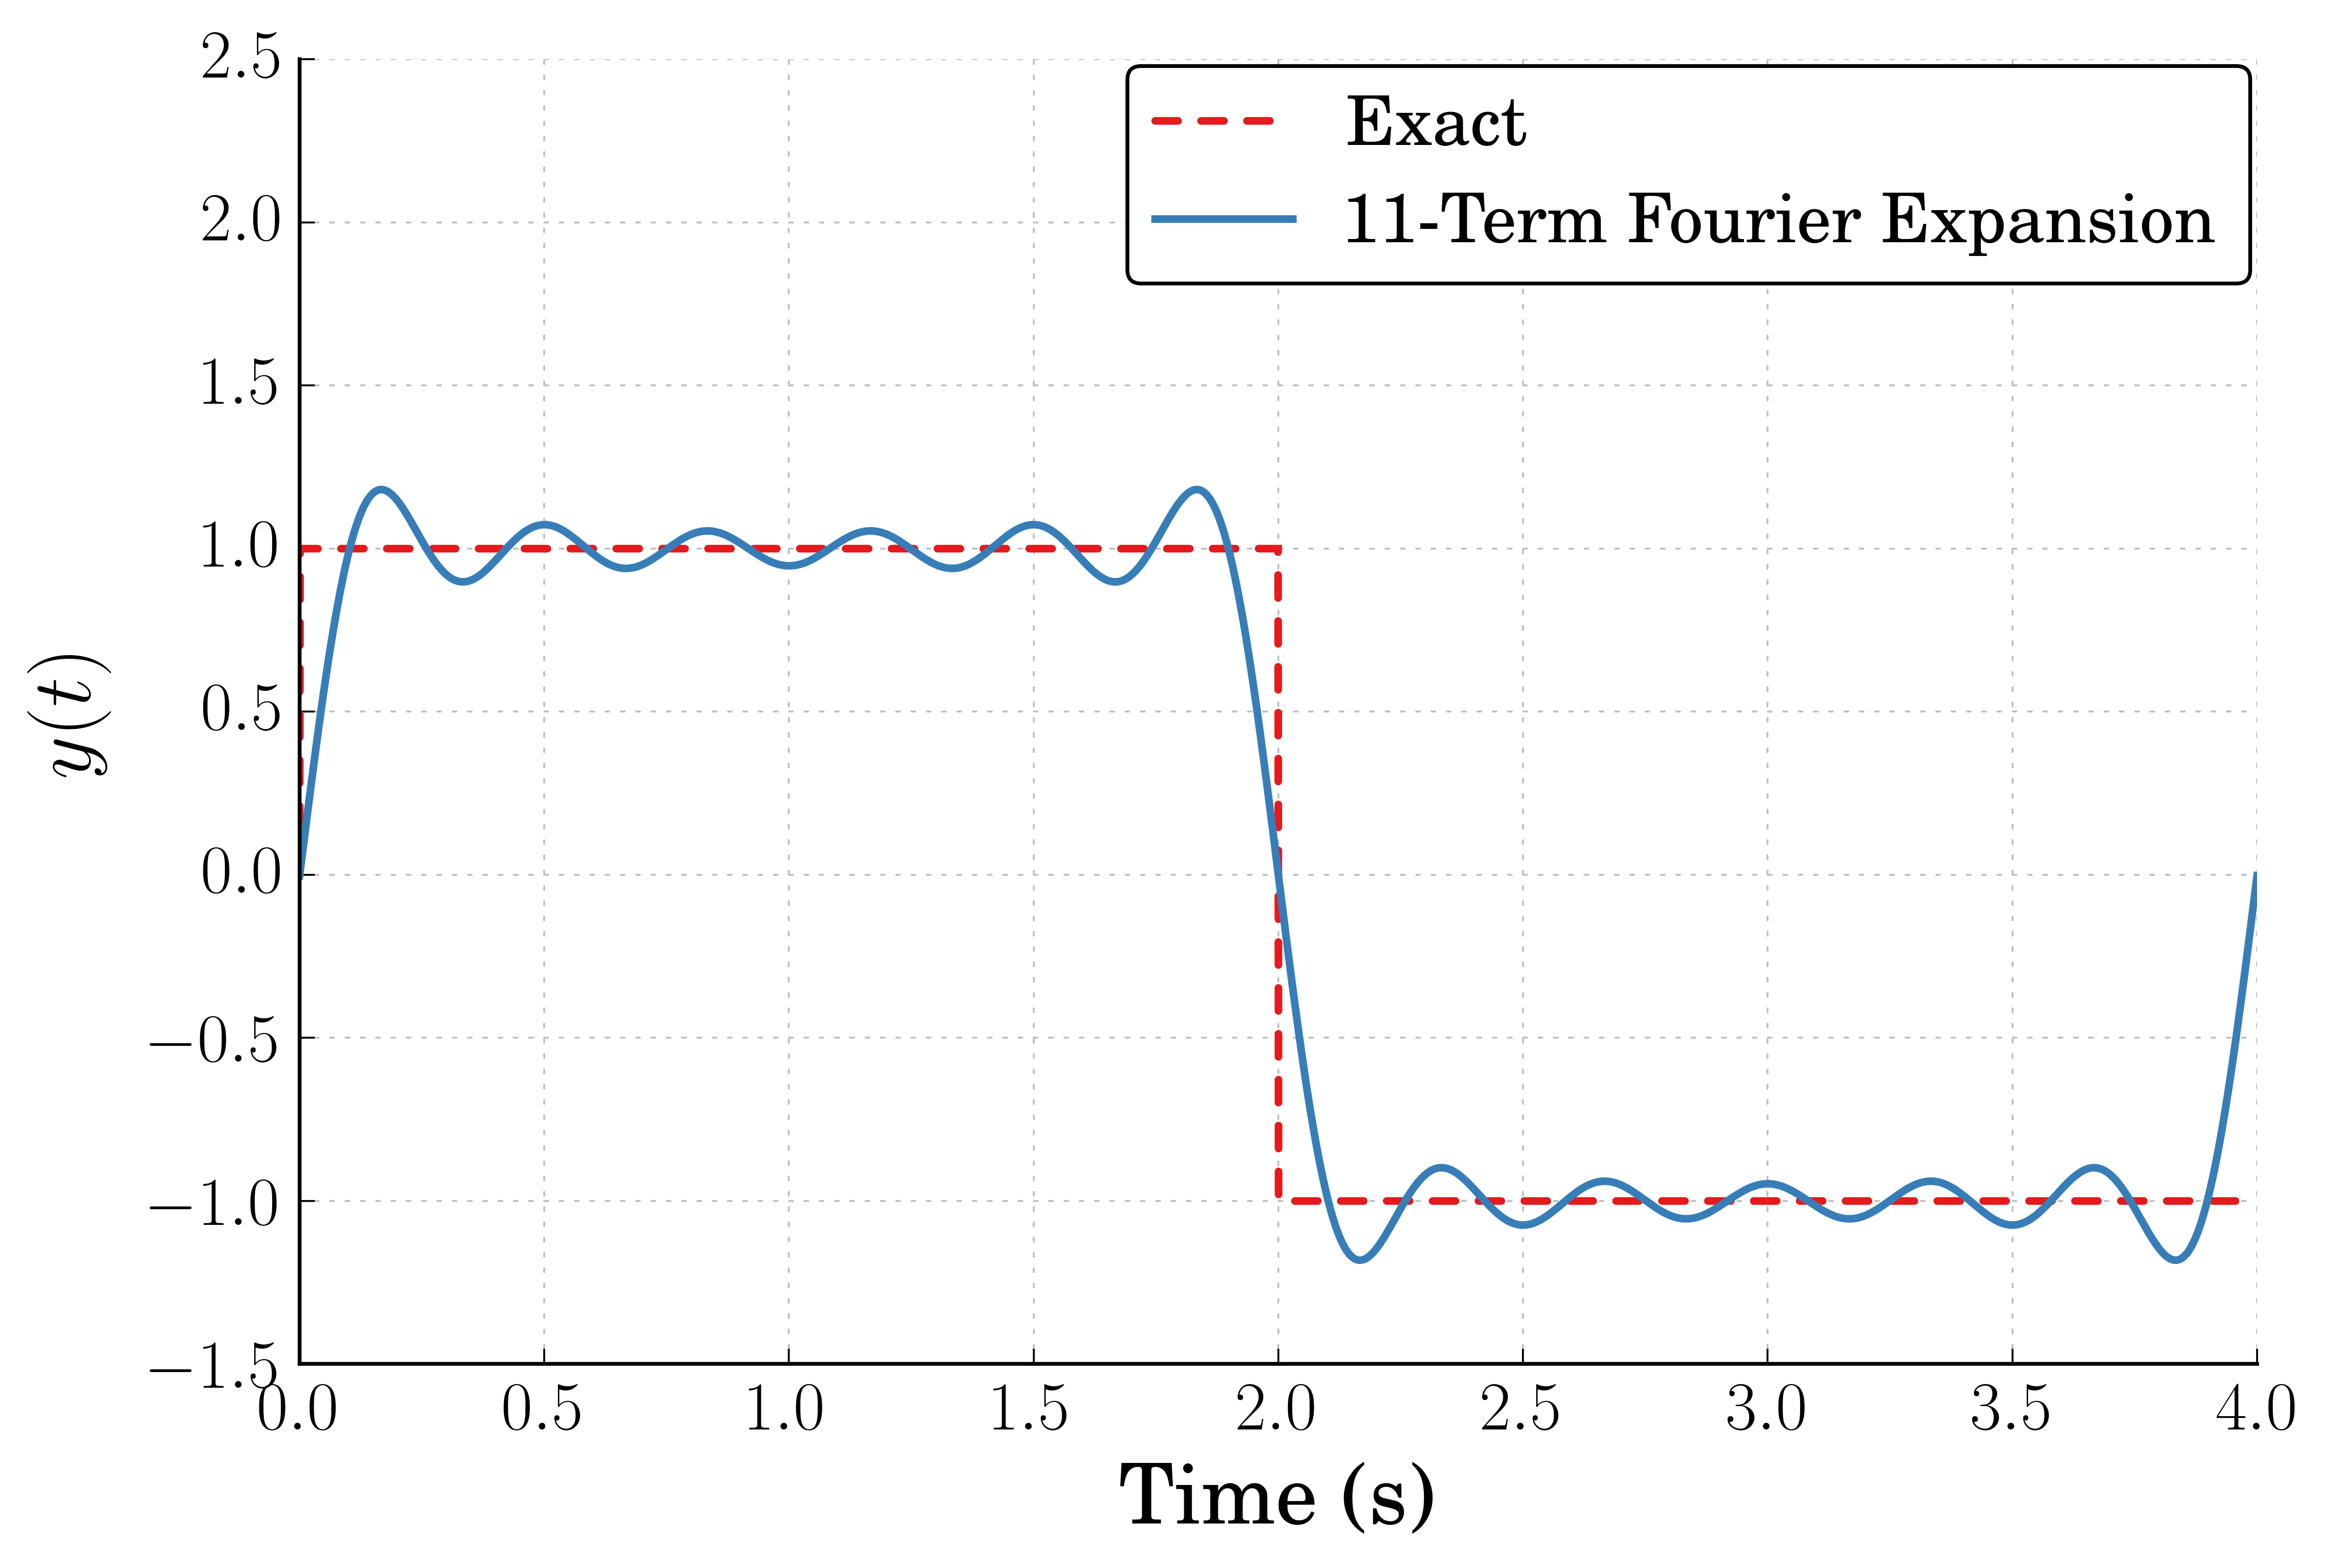

In [5]:
# Call the slider interaction
#  num_terms changes in the number of terms in the Fourier Approx, allowing between 1 and 21
interact(plot_approx, num_terms=(1, 22, 1))

## Response Comparison
Now, let's look at the response of a simple mass-spring-damper system like the one shown in Figure 3.
<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpringDamper_Seismic_Horiz.png" alt="A Mass-Spring-Damper System" width=25%/></a><br>
    <strong> Figure 3: A Mass-Spring-Damper System </strong>
</p>

The equation of motion for the system is:

$ \quad m \ddot{x} + c \dot{x} + kx = c \dot{y} + ky $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency, $\omega_n$.

$ \quad \ddot{x} + 2\zeta\omega_n\dot{x} + \omega_n^2x = 2\zeta\omega_n \dot{y} + \omega_n^2 y$

For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

### Control System Library
For the following simulations in this notebook, we will use the [Control Systems Library for Python](http://www.cds.caltech.edu/~murray/wiki/Control_Systems_Library_for_Python). Instructions on installation and use can be found at that link.

In [6]:
import control               # import the control system library

In [7]:
# Define the System Parameters
m = 1.0                      # kg
k = (2.0 * np.pi)**2         # N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = np.sqrt(k / m)          # Natural Frequency (rad/s)

z = 0.25                     # Define a desired damping ratio
c = 2 * z * wn * m           # calculate the damping coeff. to create it (N/(m/s))

wd = wn * np.sqrt(1 - z**2)  # Damped natural frequency (rad/s)

In [8]:
# Define the system to use in simulation - in transfer function form here
num = [2.0 * z * wn, wn**2]
den = [1, 2.0 * z * wn, wn**2]

# Definte the transfer function
sys = control.tf(num, den)

# run the simulation - first with the exact input
[T_out, yout_exact, xout_exact] = control.forced_response(sys, t, y)

In [9]:
# Set up the function that plots the repsonse based on slider changes
def plot_response(num_terms = 11):

    # get the a0 term
    a0 = w0/(2.0*np.pi)*np.trapz(y,t)  

    # fill arrays with zeros - Good practice, it speeds computation in large problems
    a = np.zeros((num_terms,))
    b = np.zeros((num_terms,))
    integral_cos = np.zeros((len(t),num_terms))
    integral_sin = np.zeros((len(t),num_terms))
    sin_term = np.zeros((num_terms,len(t)))
    cos_term = np.zeros((num_terms,len(t)))

    # cycle through the 1 to num_terms Fourier coefficients (a_n and b_n)
    for n in range(num_terms):

        # a_n calculations
        integral_cos[:,n] = y * np.cos((n+1) * w0 * t)     # define the integral "interior"
        a[n] = w0/np.pi * np.trapz(integral_cos[:,n], t)   # solve for a_n

        # b_n calculations
        integral_sin[:,n] = y * np.sin((n+1) * w0 * t)     # define the integral "interior"
        b[n] = w0/np.pi * np.trapz(integral_sin[:,n], t)   # solve for b_n

        sin_term[n,:] = np.sin((n+1) * w0 * t)             # calculate the nth sine term
        cos_term[n,:] = np.cos((n+1) * w0 * t)             # calculate the nth cosine_term


    # Generate the approximate input based on the Fourier coeff. calculated above
    approx = np.zeros_like(t) #First fill with zeros

    for ii in range(len(t)):
         approx[ii] = a0 + np.sum(a * cos_term[:,ii], 0) + np.sum(b * sin_term[:,ii], 0)
    
    
    # run the simulation - now with the approximate input
    [T_approx,yout_approx,xout_approx] = control.forced_response(sys,t,approx)

    # Make the figure pretty, then plot the results
    #   "pretty" parameters selected based on pdf output, not screen output
    #   Many of these setting could also be made default by the .matplotlibrc file
    fig = plt.figure(figsize=(9,6))
    ax = plt.gca()
    plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
    plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
    plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.grid(True,linestyle=':',color='0.75')
    ax.set_axisbelow(True)

    plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
    plt.ylabel('Position (m)', family='serif', fontsize=22, weight='bold', labelpad=10)

    plt.plot(t,y,':', linewidth=2, label=r'Exact Command')
    plt.plot(t, yout_exact,'--', linewidth=2, label=r'Exact Response')

    f = str(num_terms) + '-Term Approx. Resp.'
    plt.plot(t, yout_approx, linewidth=2, label=f)

    # You may need to adjust these limits for best results
    plt.ylim(-2.5, 3.5)

    leg = plt.legend(loc='upper right', fancybox=True)
    ltext  = leg.get_texts() 
    plt.setp(ltext,family='serif',fontsize=18)

### Interactive Response Plot
Now, we'll create the interactive plot. The result will have a slider that allows us to change the number of terms used in the Fourier Approximation and resulting response approximation.

***Reminder***: You will have the run the notebook locally to use the interactive features. They are *not* viewable at [http://nbviewer.ipython.org](http://nbviewer.ipython.org).

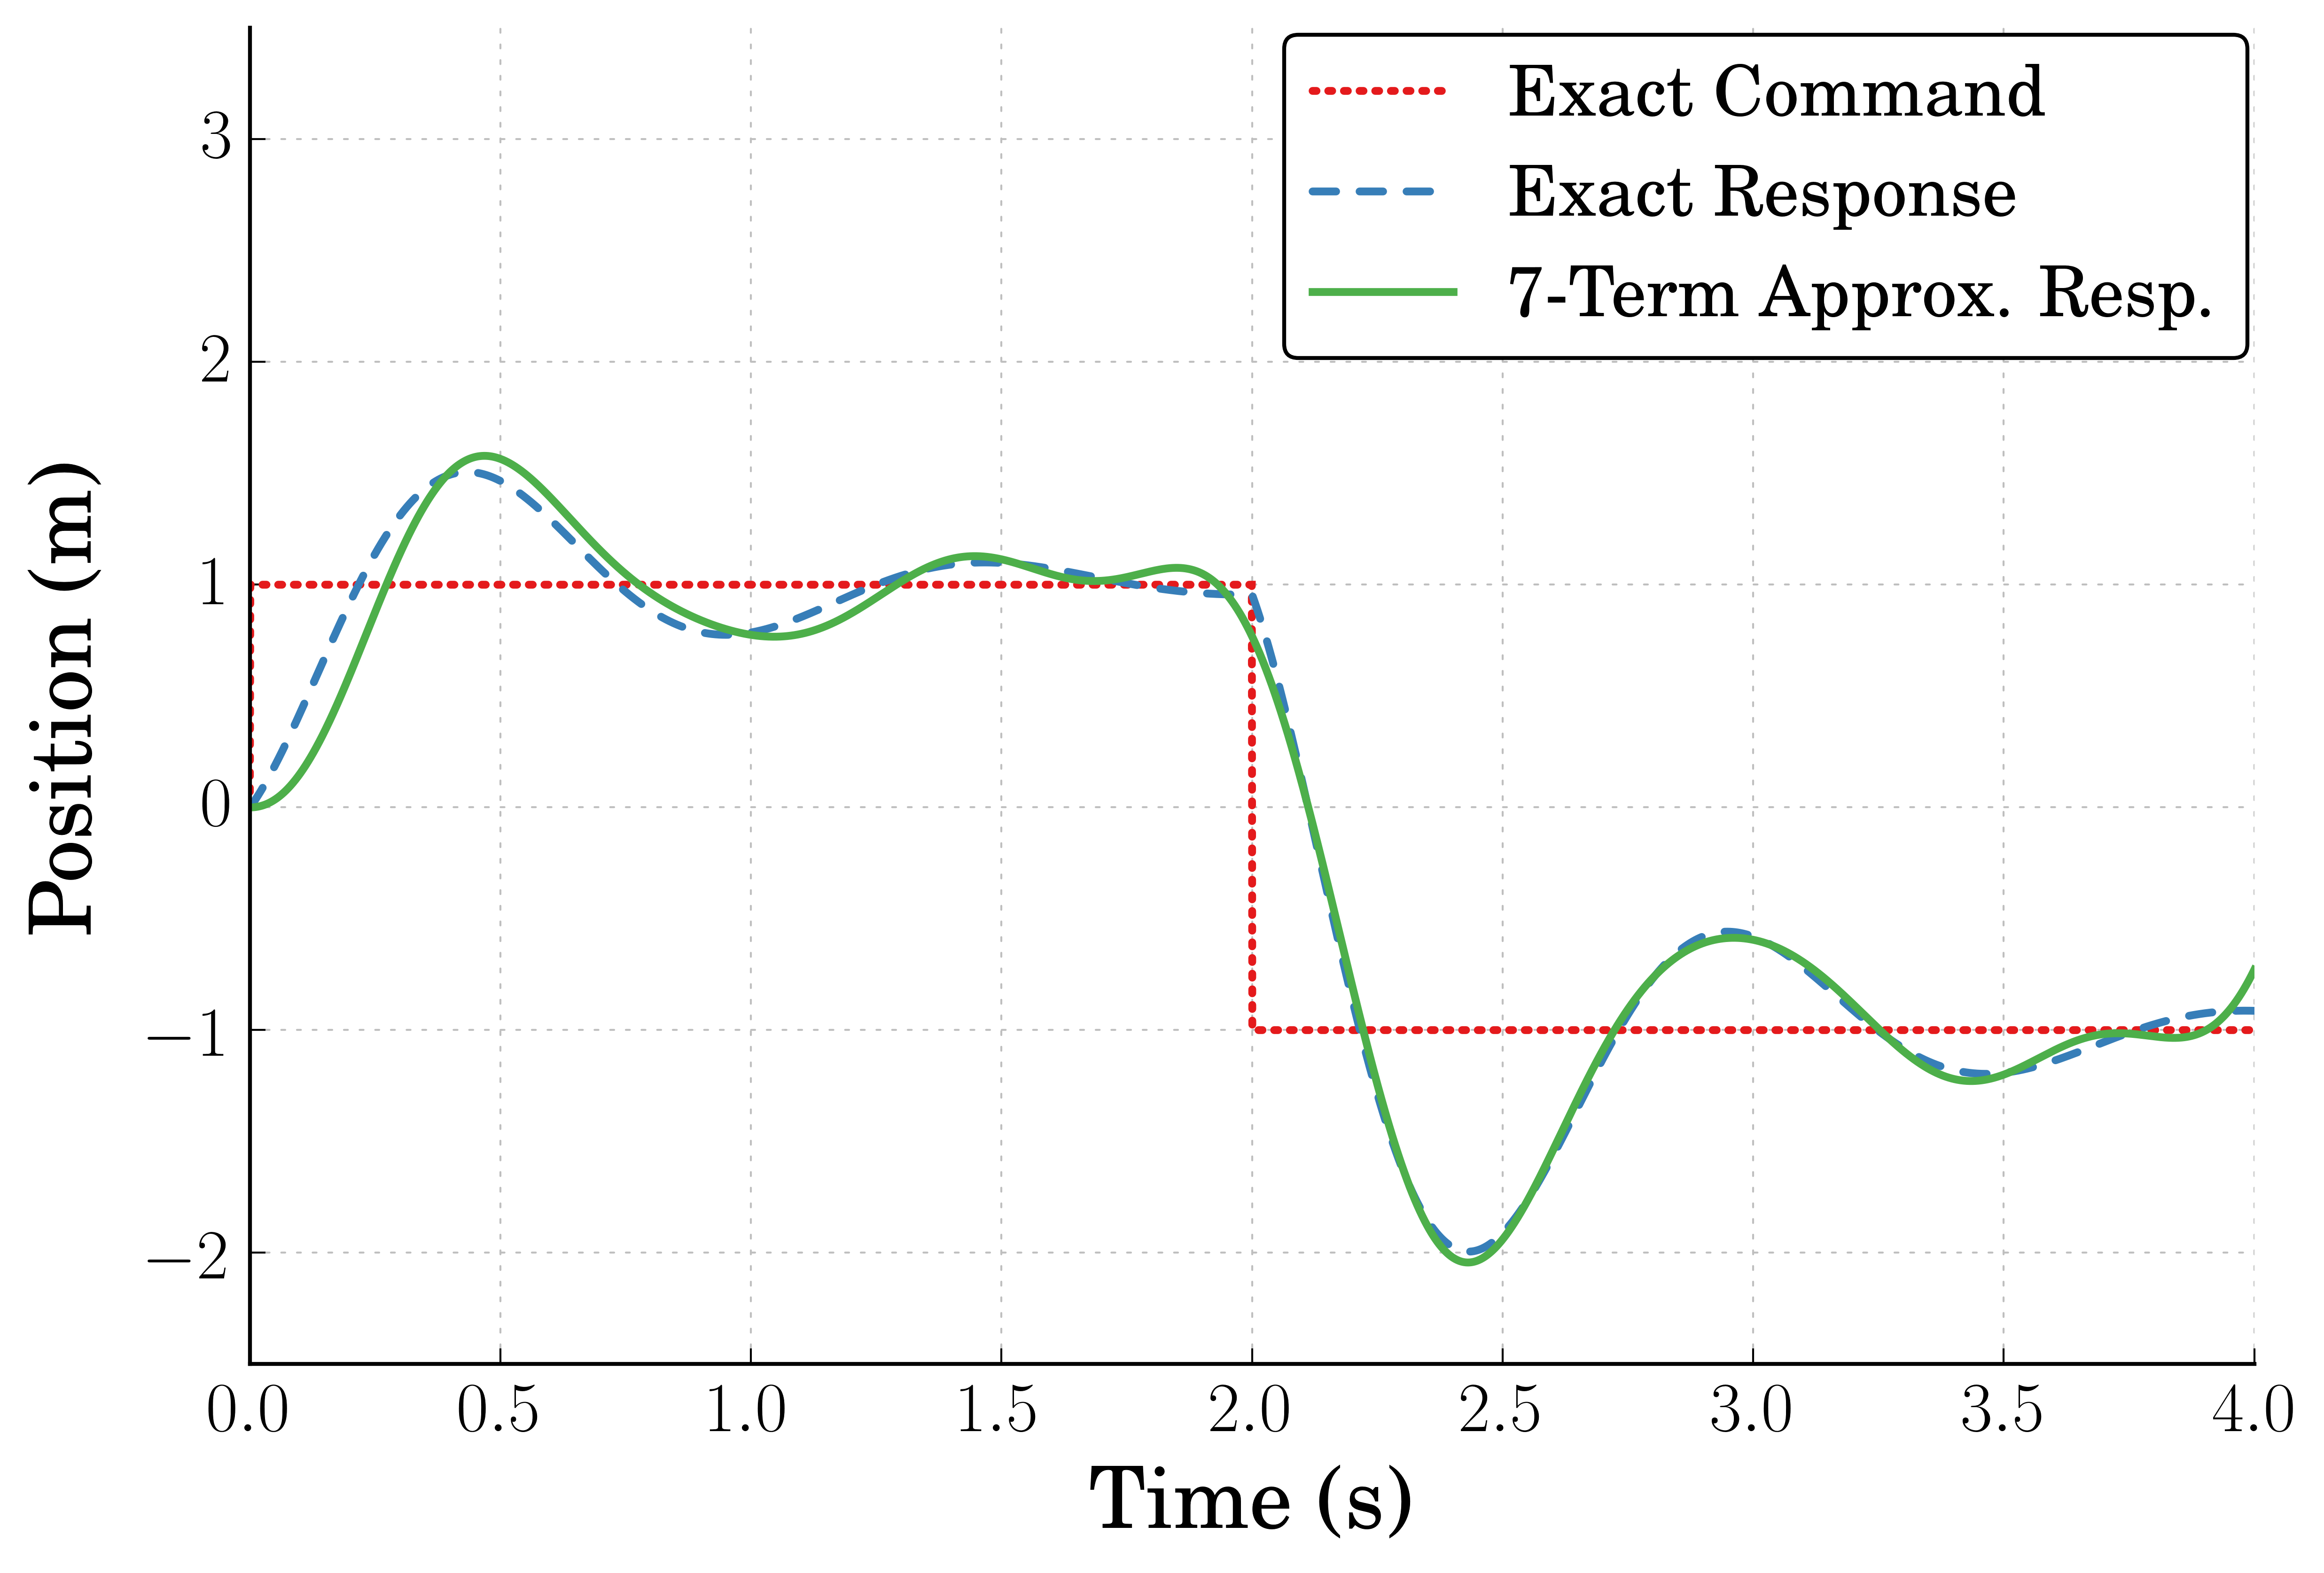

In [10]:
# Call the slider interaction
#  num_terms changes in the number of terms in the Fourier Approx, allowing between 1 and 22
interact(plot_response, num_terms=(1,22,1))

<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD-style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [11]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
import codecs
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(codecs.open(css_file, 'r', 'utf-8').read())